In [10]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 解决中文显示问题
plt.rc('font', family='Microsoft YaHei')


> 1.数据预处理

In [11]:
# 只读取第一行，获取列索引
total_data = np.array(open('../data/AsianPopulationData.csv').readline())
total_data

array('时间,阿富汗,巴林,孟加拉国,不丹,文莱,缅甸,柬埔寨,塞浦路斯,朝鲜,中国香港,印度,印度尼西亚,伊朗,伊拉克,以色列,日本,约旦,科威特,老挝,黎巴嫩,中国澳门,马来西亚,马尔代夫,蒙古,尼泊尔,阿曼,巴基斯坦,巴勒斯坦,菲律宾,卡塔尔,沙特阿拉伯,新加坡,韩国,斯里兰卡,叙利亚,泰国,土耳其,阿联酋,也门,越南,中国台湾,东帝汶,哈萨克斯坦,吉尔吉斯斯坦,塔吉克斯坦,土库曼斯坦,乌兹别克斯坦,马恩岛,约旦河西岸和加沙\n',
      dtype='<U214')

In [12]:
# 获取国家索引
country_index = np.array(
    open('../data/AsianPopulationData.csv').readline()[:-1].split(',')
)
country_index

array(['时间', '阿富汗', '巴林', '孟加拉国', '不丹', '文莱', '缅甸', '柬埔寨', '塞浦路斯', '朝鲜',
       '中国香港', '印度', '印度尼西亚', '伊朗', '伊拉克', '以色列', '日本', '约旦', '科威特', '老挝',
       '黎巴嫩', '中国澳门', '马来西亚', '马尔代夫', '蒙古', '尼泊尔', '阿曼', '巴基斯坦', '巴勒斯坦',
       '菲律宾', '卡塔尔', '沙特阿拉伯', '新加坡', '韩国', '斯里兰卡', '叙利亚', '泰国', '土耳其',
       '阿联酋', '也门', '越南', '中国台湾', '东帝汶', '哈萨克斯坦', '吉尔吉斯斯坦', '塔吉克斯坦',
       '土库曼斯坦', '乌兹别克斯坦', '马恩岛', '约旦河西岸和加沙'], dtype='<U8')

In [13]:
# 读取人口数据
population_data = np.genfromtxt('../data/AsianPopulationData.csv', delimiter=',', skip_header=1, dtype=np.str)
# population_data
# 时间索引(获取每一行的第一个元素)
time_index = population_data[:, 0]
time_index

array(['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996'], dtype='<U10')

> 2.计算2015年各个国家的人口数据

In [14]:
year = '2015'
# 获取year年所有国家的人口数据
population_by_year = population_data[time_index == year]
# 提取前十个国家的数据进行显示
population_by_year = population_by_year[0][:11]
# print(population_by_year)

- 数据以文本形式展示

In [15]:
print('%s年各个国家人口数据：'% year)
print("-"*30)
for country_name, country_data in zip(country_index[1:], population_by_year[1:]):
    print('"%s"人口为：\t%s' % (country_name, country_data))

2015年各个国家人口数据：
------------------------------
"阿富汗"人口为：	32526562
"巴林"人口为：	1377237
"孟加拉国"人口为：	160995642
"不丹"人口为：	774830
"文莱"人口为：	423188
"缅甸"人口为：	53897154
"柬埔寨"人口为：	15577899
"塞浦路斯"人口为：	1165300
"朝鲜"人口为：	25155317
"中国香港"人口为：	7305700


- 数据以柱状图展示

In [16]:
# 格式化数据
country_data = DataFrame(zip(country_index[1:], population_by_year[1:]), columns=["country", "num"])
country_data

,country,num
0,阿富汗,32526562
1,巴林,1377237
2,孟加拉国,160995642
3,不丹,774830
4,文莱,423188
5,缅甸,53897154
6,柬埔寨,15577899
7,塞浦路斯,1165300
8,朝鲜,25155317
9,中国香港,7305700


In [17]:
# sns.barplot(x=country_data["country"].index, y=country_data['num'].values)
# country_data["num"].index
# country_data["num"].values

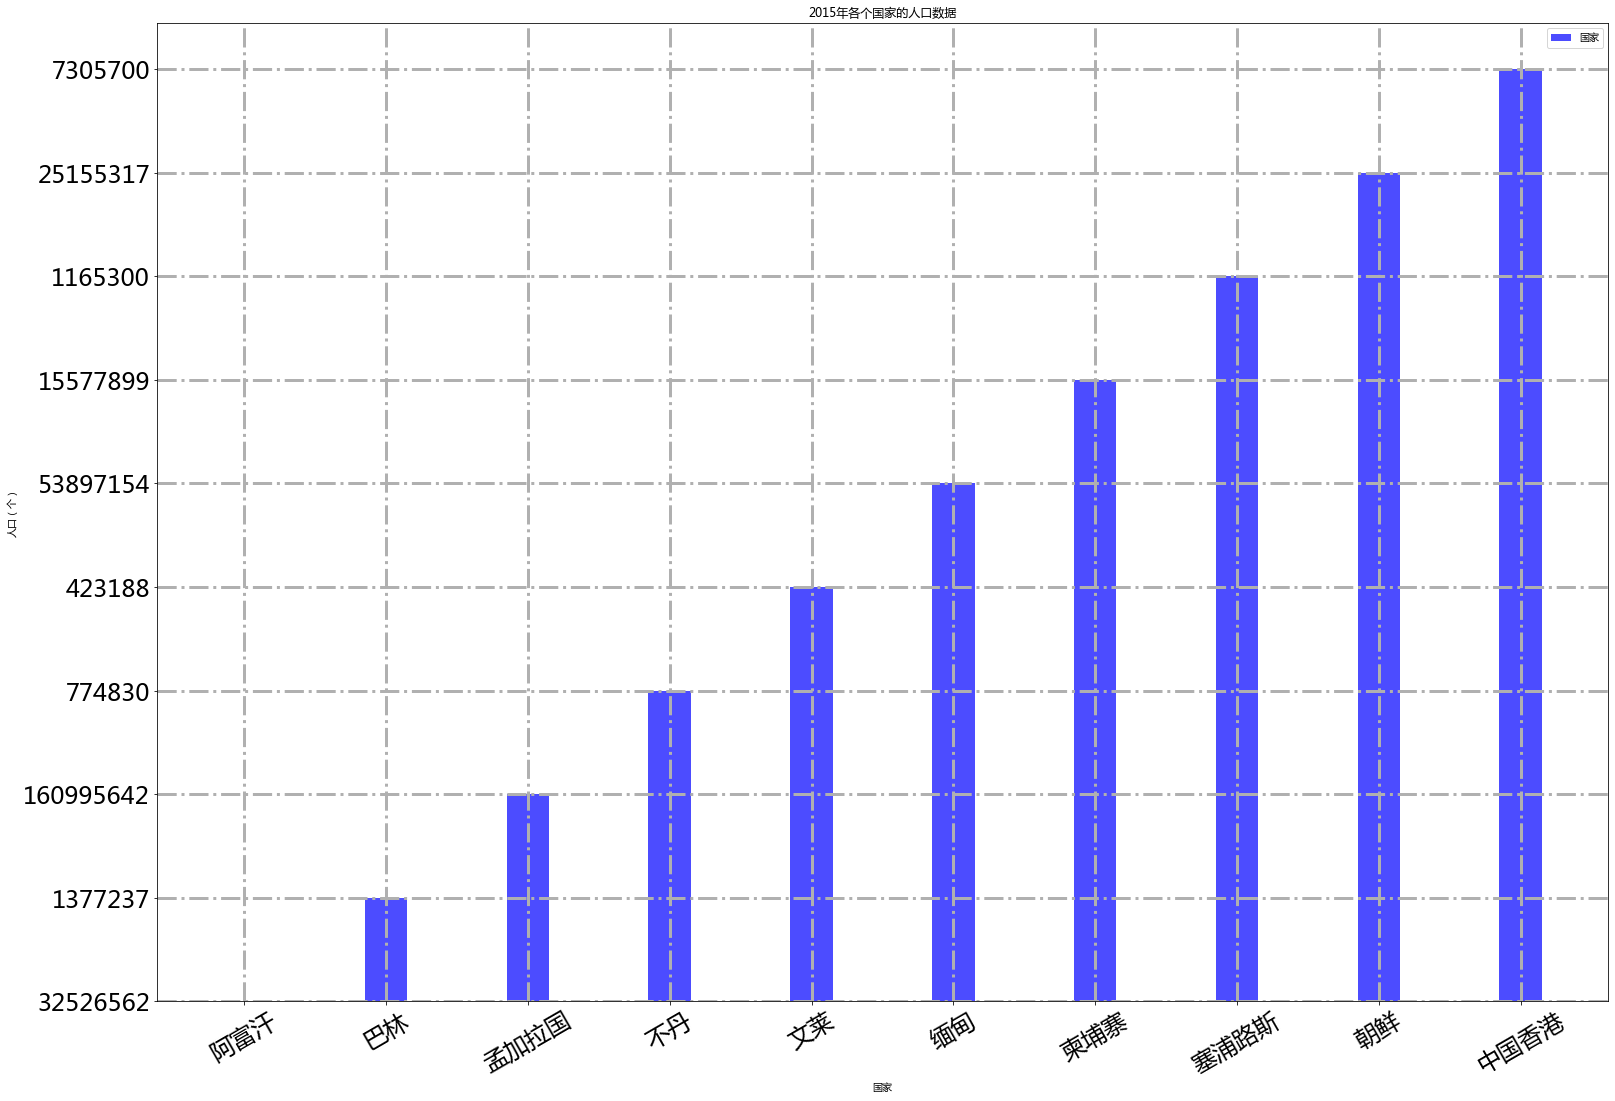

In [23]:
# bar宽度
bar_width = 0.3
# 设置画布大小
plt.figure(figsize=(26, 18))
# 每一个bar占0.3宽度
plt.bar(country_data["country"].values, country_data['num'].values, width=bar_width, alpha=0.7, label='国家', color='b')
# 显示图例
plt.legend(loc=0)

# 刻度字体大小
plt.tick_params(labelsize=24)
# 设置x轴刻度标签
plt.xticks([ ix for ix in country_data["country"].values], rotation=30)
# 设置标题
plt.title('2015年各个国家的人口数据')
plt.xlabel('国家')
plt.ylabel('人口（个）')

# 显示网格
plt.grid(True, linestyle = "-.", linewidth = "3") 

plt.show()